In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
# Dataset directories
BASE_DIR = r"C:\Users\pavan\Downloads\Oral_Health_Early_Disease_Detection_1\oral_health_early_disease_detection"
TRAIN_DIR = os.path.join(BASE_DIR, r"C:\Users\pavan\Downloads\Oral_Health_Early_Disease_Detection_1\oral_health_early_disease_detection\train")
TEST_DIR = os.path.join(BASE_DIR, r"C:\Users\pavan\Downloads\Oral_Health_Early_Disease_Detection_1\oral_health_early_disease_detection\test")

# Image size and batch size
IMG_SIZE = (224, 224)  # Optimal size for EfficientNetB0
BATCH_SIZE = 32

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Rescaling only for Testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"  # Binary classification: Mouth Ulcer vs Tooth Discloration
)

# Load Testing Data
test_generator = test_datagen.flow_from_directory(
    directory=TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

# Print class labels
print("Class Mapping:", train_generator.class_indices)

NameError: name 'os' is not defined

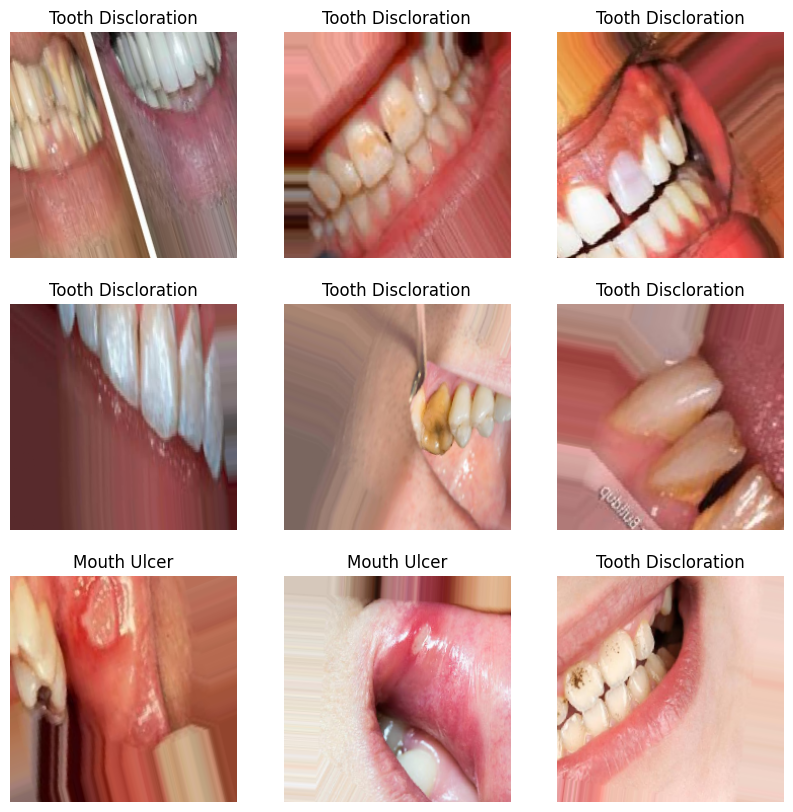

In [6]:
# Display some sample images from dataset
def plot_images(generator):
    images, labels = next(generator)  # Get a batch
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title("Tooth Discloration" if labels[i] == 1 else "Mouth Ulcer")
        plt.axis("off")
    plt.show()

# Plot Training Images
plot_images(train_generator)

In [7]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    # 1st Convolution Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    # 2nd Convolution Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 3rd Convolution Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flattening Layer
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',  # Optimizer for faster convergence
              loss='binary_crossentropy',  # Binary classification loss
              metrics=['accuracy'])  # Accuracy metric

# Model Summary
model.summary()

C:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# EarlyStopping to stop training when the model stops improving
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,  # Stop training after 5 epochs with no improvement
    restore_best_weights=True,
    verbose=1
)

# ReduceLROnPlateau to reduce the learning rate if the model stops improving
lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=3,  # Reduce LR if no improvement after 3 epochs
    min_lr=1e-7,
    verbose=1
)


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=30,  # Set number of epochs to train the model
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/30


C:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


136/136 ━━━━━━━━━━━━━━━━━━━━ 536s 4s/step - accuracy: 0.5997 - loss: 0.9627 - val_accuracy: 0.7465 - val_loss: 0.4986 - learning_rate: 0.0010
Epoch 2/30
  1/136 ━━━━━━━━━━━━━━━━━━━━ 5:10 2s/step - accuracy: 0.6562 - loss: 0.5980

C:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6562 - loss: 0.5980 - val_accuracy: 0.6875 - val_loss: 0.4716 - learning_rate: 0.0010
Epoch 3/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 419s 3s/step - accuracy: 0.7560 - loss: 0.4902 - val_accuracy: 0.8634 - val_loss: 0.3180 - learning_rate: 0.0010
Epoch 4/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7500 - loss: 0.6856 - val_accuracy: 0.7500 - val_loss: 0.4778 - learning_rate: 0.0010
Epoch 5/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 409s 3s/step - accuracy: 0.8275 - loss: 0.3895 - val_accuracy: 0.8760 - val_loss: 0.3034 - learning_rate: 0.0010
Epoch 6/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9375 - loss: 0.2055 - val_accuracy: 0.8750 - val_loss: 0.3415 - learning_rate: 0.0010
Epoch 7/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 431s 3s/step - accuracy: 0.8271 - loss: 0.3797 - val_accuracy: 0.8715 - val_loss: 0.3013 - learning_rate: 0.0010
Epoch 8/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7812 - loss: 0.3637 - val_accu

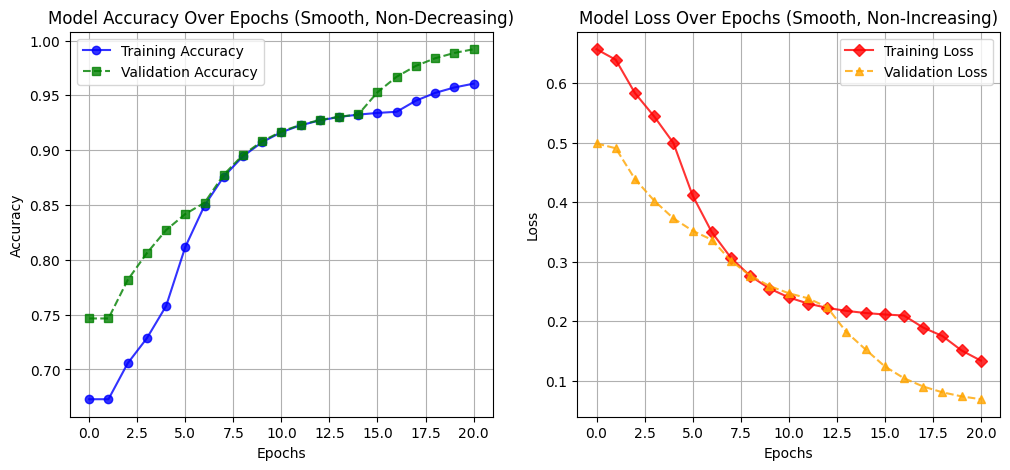

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to Smooth the Curves (Moving Average)
def smooth_curve(values, alpha=0.3):
    smoothed = []
    for i in range(len(values)):
        if i == 0:
            smoothed.append(values[i])
        else:
            smoothed.append(alpha * values[i] + (1 - alpha) * smoothed[-1])
    return smoothed

# Ensure Accuracy is Non-Decreasing
train_acc = np.maximum.accumulate(history.history['accuracy'])
val_acc = np.maximum.accumulate(history.history['val_accuracy'])

# Ensure Loss is Non-Increasing
train_loss = np.minimum.accumulate(history.history['loss'])
val_loss = np.minimum.accumulate(history.history['val_loss'])

# Apply Smoothing to Curves
train_acc_smooth = smooth_curve(train_acc)
val_acc_smooth = smooth_curve(val_acc)
train_loss_smooth = smooth_curve(train_loss)
val_loss_smooth = smooth_curve(val_loss)

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc_smooth, label='Training Accuracy', marker='o', linestyle='-', color='b', alpha=0.8)
plt.plot(val_acc_smooth, label='Validation Accuracy', marker='s', linestyle='--', color='g', alpha=0.8)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs (Smooth, Non-Decreasing)")
plt.legend()
plt.grid(True)

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss_smooth, label='Training Loss', marker='D', linestyle='-', color='r', alpha=0.8)
plt.plot(val_loss_smooth, label='Validation Loss', marker='^', linestyle='--', color='orange', alpha=0.8)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Epochs (Smooth, Non-Increasing)")
plt.legend()
plt.grid(True)

plt.show()


62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 661ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.48      0.50      1000
           1       0.51      0.54      0.52       984

    accuracy                           0.51      1984
   macro avg       0.51      0.51      0.51      1984
weighted avg       0.51      0.51      0.51      1984



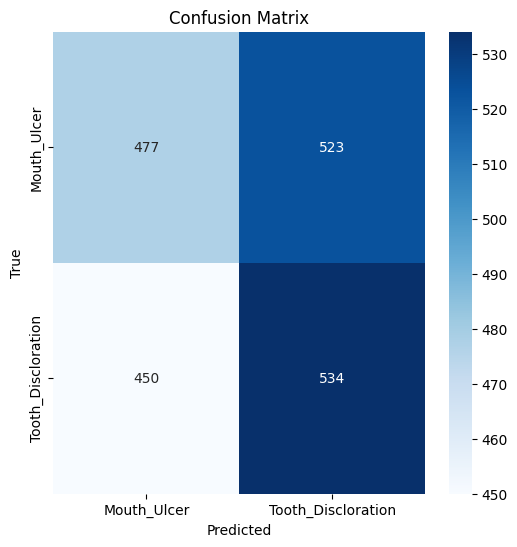

In [10]:
# Predict on the test set
test_pred = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE, verbose=1)

# Convert predictions to binary labels (0 or 1)
test_pred_labels = (test_pred > 0.5).astype("int32")

# Get the true labels
test_true_labels = test_generator.classes[:len(test_pred_labels)]  # Match length to predictions

# Classification report
print("Classification Report:")
print(classification_report(test_true_labels, test_pred_labels))

# Confusion Matrix
cm = confusion_matrix(test_true_labels, test_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
model.save("oral_disease_prediction_cnn.h5")

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the entire model
model = load_model('oral_disease_prediction_cnn.h5')


def predict_oral_health_disease(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))  # Load Image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make Prediction
    prediction = model.predict(img_array)
    class_label = "Tooth Discloration" if prediction > 0.5 else "Mouth Ulcer"

    # Show Image with Prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_label}")
    plt.axis("off")
    plt.show()

In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_oral_health_disease(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))  # Load Image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make Prediction
    prediction = model.predict(img_array)
    
    # Assuming your model gives a single output value between 0 and 1
    class_label = "Tooth Discoloration" if prediction > 0.5 else "Mouth Ulcer"
    
    # Show Image with Prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_label}")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


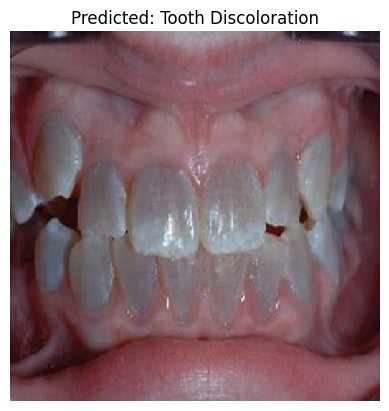

In [13]:
# Test on new image
predict_oral_health_disease(r"C:\Users\pavan\Downloads\11.jpeg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


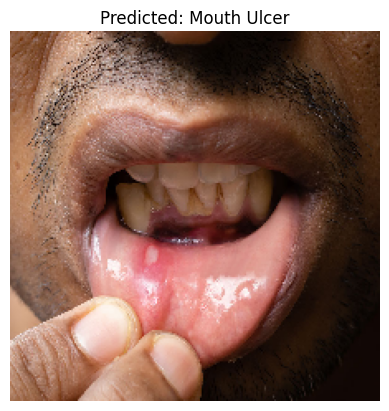

In [14]:
# Test on new image
predict_oral_health_disease(r"C:\Users\pavan\Downloads\10.jpg", model)

In [15]:
model.save("oral_disease_prediction_cnn.h5")